errorRateModelOrder =
    7.5000
A_RMSE =
    0.0450
D_RMSE =
    0.0935
relevantElements =
   659
precision =
    0.9712
recall =
    0.9727


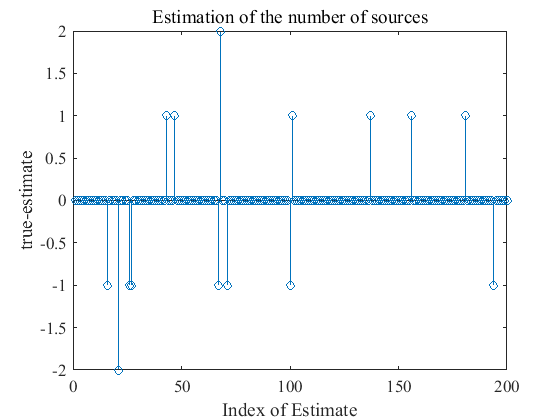

In [1]:
% evaluate 200 iterations test with the GMM overfitting algorithm.
clear all; close all;
cd /home/jacob/panning_project/test_programs/
%load mats/sep2017/test_SQAM_diagonal_250samples_k35_non-contra.mat
load mats/sep2017/test_IOWA_diagonal_250samples_k35_non-contra.mat


[errorAngle, errorDelay,trueNumClusters,estimatedNumClusters,errorRateModelOrder,totalEstimatedParamsPruned, trueMinusEstimated] ...
    = evaluate_overfitting_and_pruning(saved);

% detect correct estimates
thrForCorrect = 0.5; % both for angle(degrees) and samples(delay)
correctMask=(errorAngle<thrForCorrect) & (errorDelay<thrForCorrect);
correctAmplitudes = errorAngle(correctMask);
correctDelay = errorDelay(errorAngle<thrForCorrect);

%RMSE Error for correct estimated clusters.
A_RMSE=sqrt(mean(correctAmplitudes.^2))
D_RMSE=sqrt(mean(correctDelay.^2))

% Precision Recall
relevantElements = sum(trueNumClusters)
truePositiveClusters  = correctAmplitudes;
truePositives = sum(correctMask);
falsePositives = estimatedNumClusters-truePositives;
falseNegatives = trueNumClusters;

precision =  truePositives/sum(estimatedNumClusters)
recall = truePositives/relevantElements

% plots
figure; stem(trueMinusEstimated);
xlabel('Index of Estimate');
ylabel('true-estimate');
title('Estimation of the number of sources');

errorRateModelOrder =
    33
A_RMSE =
    0.0772
D_RMSE =
    0.2462
relevantElements =
   697
precision =
    0.8579
recall =
    0.8924


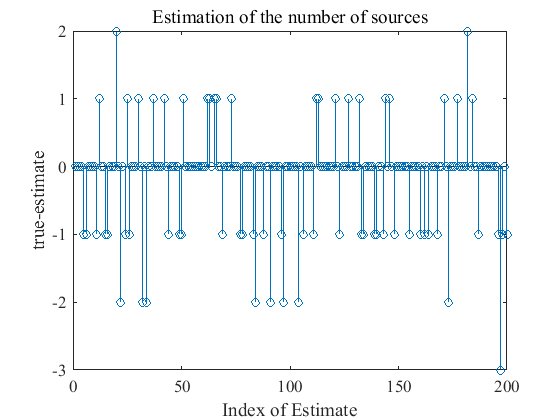

In [3]:
% evaluate 200 iterations test with the GMM overfitting algorithm.
clear all; close all;
cd /home/jacob/panning_project/test_programs/
load mats/sep2017/test_SQAM_diagonal_250samples_k35_non-contra.mat
%load mats/sep2017/test_IOWA_diagonal_250samples_k35_non-contra.mat


[errorAngle, errorDelay,trueNumClusters,estimatedNumClusters,errorRateModelOrder,totalEstimatedParamsPruned, trueMinusEstimated] ...
    = evaluate_overfitting_and_pruning(saved);

% detect correct estimates
thrForCorrect = 0.5; % both for angle(degrees) and samples(delay)
correctMask=(errorAngle<thrForCorrect) & (errorDelay<thrForCorrect);
correctAmplitudes = errorAngle(correctMask);
correctDelay = errorDelay(errorAngle<thrForCorrect);

%RMSE Error for correct estimated clusters.
A_RMSE=sqrt(mean(correctAmplitudes.^2))
D_RMSE=sqrt(mean(correctDelay.^2))

% Precision Recall
relevantElements = sum(trueNumClusters)
truePositiveClusters  = correctAmplitudes;
truePositives = sum(correctMask);
falsePositives = estimatedNumClusters-truePositives;
falseNegatives = trueNumClusters;

precision =  truePositives/sum(estimatedNumClusters)
recall = truePositives/relevantElements

% plots
figure; stem(trueMinusEstimated);
xlabel('Index of Estimate');
ylabel('true-estimate');
title('Estimation of the number of sources');

trueParams =
   40.0000    6.0000
    7.5000    6.0000
   35.0000    1.0000
  -40.0000   -6.0000
   -7.5000   -6.0000
muPruned =
   34.9953   40.0042  -40.0783    7.0076   -8.1764  -31.6964
    0.9848    5.4696   -5.0121    5.8174   -5.5418   -2.9145
alphaPruned =
    0.6849    0.1311    0.0183    0.0510    0.1086    0.0061
trueParams =
   15.0000    1.0000
   32.5000    3.0000
   27.5000    3.0000
  -15.0000   -3.0000
  -32.5000   -5.0000
muPruned =
   15.0030  -14.9935   27.4989  -32.4657   32.4417
    1.0009   -3.0020    3.0009   -4.2886    2.8642
alphaPruned =
    0.3308    0.3886    0.1584    0.0493    0.0729
trueParams =
   12.5000    6.0000
  -12.5000   -5.0000
muPruned =
  -12.4970   12.4754
   -5.0015    5.9662
alphaPruned =
    0.9081    0.0919
trueParams =
   40.0000    6.0000
   22.5000    5.0000
   42.5000    6.0000
  -22.5000   -2.0000
  -40.0000   -5.0000
muPruned =
  -39.9356   22.5017   41.0953
   -4.5722    5.0003    5.9176
alphaPruned =
    0.1885    0.5902    0.2213

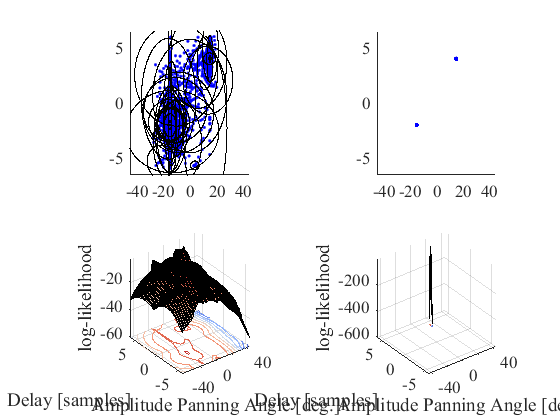

In [4]:
clear all; clf;
for iter=1:200
elipses=[];
elipsesPruned=[];
% PARAMETERS FOR CLUSTERING
regVal  = 0.5e-4;
covType = 1;
plotFlag= 0;
thrStop = 1e-3; 
kmax=35;
%% create random sources from SQAM
fs = 44100;

maxNumSources=5; 
maxDelaySec= 150e-6;
maxDelaySamples = floor(maxDelaySec*fs);
maxPanAngle=44;

trueNumSources = randi(maxNumSources-1)+1;
[theta, delaySec, trueParams] = smc_random_panning_parameters(trueNumSources,fs, maxDelaySec, maxPanAngle);

[xFullband,fileNumber] = smc_apply_panning_to_sqam_max_duration(theta, delaySec, trueNumSources, fs);

x=xFullband;
% parameters for the fourier transform
%% estimate spatial distribution space
wlen     = floor(600e-3*fs);
NMin = floor(wlen/4); KMax = 10; % only if optimal segmentation is applied
NFFT  = 2^nextpow2(NMin*KMax);

[X] = smc_estimate_panning_space_from_optimal_segments(x, ones(1000,1)*wlen, fs, trueNumSources, NFFT, maxDelaySamples, maxPanAngle);

%% estimate overfitted statististics
% overfitting
k=kmax;
[k,alpha,mu,C] = gmm_overfitted(X',kmax,kmax,regVal,thrStop,covType,plotFlag);

%% remove sticky clusters here...
level=5; % the level parameter is related the region size and affects available proximity.
[XPruned, labels, elipses, elipsesPruned,kPruned,alphaPruned,muPruned,CPruned] ...
    = remove_sticky_clusters(X, fs, trueNumSources,alpha,mu,C,level);

%% re-estimate clusters after pruning data model
kmax = size(elipsesPruned,3);
%[kPruned,alphaPruned,muPruned,CPruned] = gmm_mmdl(XPruned', 2, kmax, regVal, thrStop, covType, plotFlag);
[kPruned,alphaPruned,muPruned,CPruned] = gmm_overfitted(XPruned',kPruned,kPruned,regVal,thrStop,covType,plotFlag,muPruned);




%% plots and print
figure(1);
    subplot(221); scatter(X(:,1)*maxPanAngle,X(:,2)*maxDelaySamples,'.b'); axis([-45,45,-6.5,6.5])
        hold on; 
            for ii=1:size(elipses,3), ...
                plot(elipses(1,:,ii)*maxPanAngle,elipses(2,:,ii)*maxDelaySamples, 'k'); 
            end 
        hold off;
        hold on; 
            for ii=1:size(elipsesPruned,3), ...
                plot(elipsesPruned(1,:,ii)*maxPanAngle,elipsesPruned(2,:,ii)*maxDelaySamples, 'k--', 'linewidth',3); 
            end 
        hold off;
    subplot(222); scatter(XPruned(:,1)*maxPanAngle,XPruned(:,2)*maxDelaySamples','.b');axis([-45,45,-6.5,6.5])
    subplot(223); plot_GMM(X, alpha, mu, C, maxPanAngle, maxDelaySamples);
    subplot(224); plot_GMM(XPruned, alphaPruned, muPruned, CPruned, maxPanAngle, maxDelaySamples);
drawnow;
% print result
trueParams
muPruned=muPruned.*[maxPanAngle maxDelaySamples]'
kPruned = size(muPruned,2);
muAlphas=muPruned(:,alphaPruned>1/(kPruned));
alphaPruned

clear X;
clear XPruned;
clear alphaPruned;
%saved.detC{iter} = detC; clear detC;
clear muPruned;
clear mu;
clear C;
clear CPruned;
clear alpha;
clear k;
clear theta;
clear delaySec;
clear kPruned;
clear x;
clear xFullband;
clear labels;
clear fileNumber;
clear trueParams;
clear trueNumSources;
%saved.beta{iter} = beta; clear beta;
end

Error using eval
Undefined function or variable 'label'.


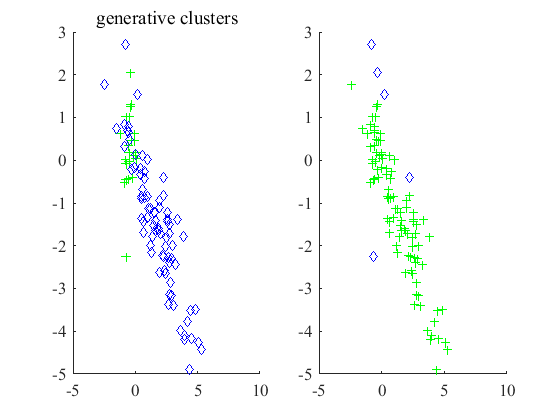

In [3]:
close all; clear;
d = 2;
k = 2;
n =100;
[Y,z] = mixGaussRnd(d,k,n);
[~,~,label_true] = unique(z);

subplot(1,2,1);
    title('generative clusters');
    scatterMixture(Y',label_true');

[clusters,proba] = VB_DirichletPrior(Y,20);
[~,~,label_estimated] = unique(clusters);

    subplot(1,2,2);
    scatterMixture(Y',label_estimated');
% run_vibp( Y , 50 )
label